## Importing Required Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


##### Generate random heights (in cm) and weights (in kg) for 1000 records


In [86]:
# Heights (mean 170 cm, std 10 cm)
heights = np.random.normal(170, 10, 1000)

In [87]:
# Strong correlation: weight = 0.9*height - 90 + small noise
weights = 0.9 * heights - 90 + np.random.normal(0, 3, 1000)  # noise std=3 kg

In [88]:
# Create DataFrame
df = pd.DataFrame({
    'Height_cm': np.round(heights, 2),
    'Weight_kg': np.round(weights, 2)
})

In [89]:
df

,Height_cm,Weight_kg
0,179.50,70.34
1,186.01,74.36
2,173.89,65.12
3,155.10,50.23
4,161.47,56.78
...,...,...
995,178.99,68.97
996,161.18,57.76
997,176.20,72.68
998,165.78,60.61


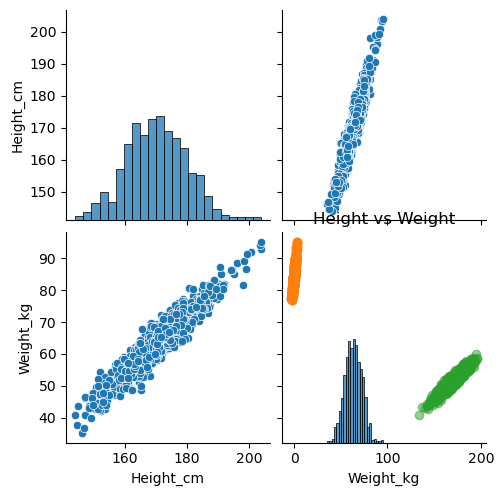

In [90]:
# Scatter plot: Height vs Weight
plt.scatter(df['Height_cm'], df['Weight_kg'], alpha=0.5)
plt.title("Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

In [91]:
## Correlation

In [92]:
df.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.952701
Weight_kg,0.952701,1.000000


In [93]:
sns.pairplot(df)

### Independent and Dependent Features

In [95]:
X = df[['Weight_kg']] ## Independent feature should be data frame or 2 dimensional array
X.head()

,Weight_kg
0,70.34
1,74.36
2,65.12
3,50.23
4,56.78


In [96]:
y = df['Height_cm'] ## This variable can be in series or 1D
y.head()

0    179.50
1    186.01
2    173.89
3    155.10
4    161.47
Name: Height_cm, dtype: float64

### Train Test Split 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 1)
(250, 1)
(750,)
(250,)


### Standardization

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [102]:
X_test = scaler.transform(X_test)

## Appling Simple Linear Regression

In [105]:
regression = LinearRegression(n_jobs=-1) ## for the processor 

In [106]:
# Assign regression to train data
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [107]:
print("Coefficient or slop: ",regression.coef_[0])

Coefficient or slop:  9.678141829400777


In [108]:
print("Intercept: ",regression.intercept_)

Intercept:  169.53141333333332


In [109]:
## Plot the training data plot best fit line

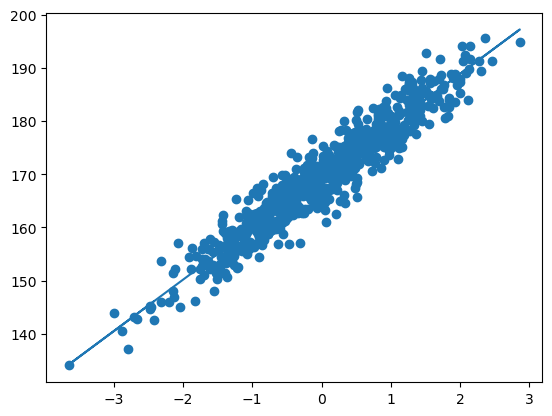

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

## Prediction for the test data

1. Predicted height output = intercept + coef_(weight)
2. y_pred_test = 169.5314 + 9.6781 (X_test)

In [142]:
y_pred = regression.predict(X_test)

In [145]:
## Performance Matrix

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [149]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8.5825507222226
2.363234580931708
2.9295990719247915


## R Square
Formula

**R^2 = 1-SSR/SST**

R^2 = Coefficient of determination

SSR = sum of squares of residuals

SST = Total sum of Square

In [154]:
from sklearn.metrics import r2_score

In [156]:
score = r2_score(y_test,y_pred)
print(score)

0.8991106074524012


## Adjusted R Square

In [159]:
## Display Adjusted R-Sqared
1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.898703795385677

## OLS Linear Regression

In [166]:
import statsmodels.api as sm

In [168]:
model = sm.OLS(y_train, X_train).fit()

In [170]:
prediction = model.predict(X_test)
print(prediction)

[ -2.69727004  -5.23397599   0.29241911  -1.03633162  -8.31426179
  -1.29805525  -4.27767812 -18.36042266  17.64670903  -7.20696951
   4.95311298  -1.70070699 -16.80014718   1.2386507    9.241354
  -2.74760151 -10.78050369  10.37884516   8.10386284  -0.85513834
   4.32900279  -6.05941206  14.48589289  -6.57279302  -5.94868283
   5.10410739   7.0771009  -10.74023851  -9.3712226   16.86153814
   5.68795241   0.98699336  -7.46869314  -8.10286963   1.11785518
  -9.17996303  17.3849854    5.95974233   0.95679448 -10.95163068
 -16.89074382  -8.90817311 -14.89761771  -6.81438407   2.86939024
   4.66119047   0.52394386  -7.04590882   4.70145565   5.56715689
 -20.87699603  -2.64693858  -5.28430746   3.58409707   2.08421935
  -1.48931483  -6.11980982 -10.25705643   4.6209253  -20.38374765
  12.28137462  -6.35133457  -3.40191058 -13.70979508 -14.82715366
   9.04002813   0.32261799  -7.57942237  -6.08961094  10.1573867
   5.3960299  -16.38742914   2.67813066  -7.00564364 -16.9108764
   7.22809531 

In [172]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              2.440
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                       0.119
Time:                        10:57:29   Log-Likelihood:                         -4914.1
No. Observations:                 750   AIC:                                      9830.
Df Residuals:                     749   BIC:                                      9835.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [178]:
## Prediction for new data
regression.predict(scaler.transform([[92]]))

C:\Users\Appex\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([198.965752])